Este es mi primer proyecto en el campo de la ciencia de datos, en el cual me enfocaré en el análisis de datos relacionados con la diabetes. A lo largo del proceso, iré desglosando el código paso a paso, con el objetivo de aprender cada parte y comprender su función. Este enfoque será como una guía detallada, proporcionando información relevante y permitiéndome construir conocimientos prácticos que podré consultar en el futuro.

In [16]:
# Importación de bibliotecas necesarias para el análisis de datos
import pandas as pd  # Pandas se utilizará para la manipulación y análisis de datos 
import seaborn as sns # Seaborn se utilizará para la visualización de datos
import matplotlib.pyplot as plt # Matplotlib se utilizará para la visualización de datos

# antes de importar los datos, les pondré nombres a las columnas
columns=["preg","clas","pres","skin","test","mass","pedi","age","class"]

# usaré pandas para importar mis datos, los cuales los tengo en una carpeta en el disco
data = pd.read_csv("data/pima-indians-diabetes.csv", names=columns)

data

,preg,clas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,627.00,50,1
1,1,85,66,29,0,26.6,351.00,31,0
2,8,183,64,0,0,23.3,672.00,32,1
3,1,89,66,23,94,28.1,167.00,21,0
4,0,137,40,35,168,43.1,2288.00,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,171.00,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,245.00,30,0
766,1,126,60,0,0,30.1,349.00,47,1


Una vez importados los datos, se procederá a analizar las principales características para comprender la distribución de los mismos, así como las clases presentes en el conjunto de datos.

In [2]:
# se usara el segmento de codigo data.head() para visualizar los primeros 5 registros de la base de datos
data.head(5)

,preg,clas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,627.0,50,1
1,1,85,66,29,0,26.6,351.0,31,0
2,8,183,64,0,0,23.3,672.0,32,1
3,1,89,66,23,94,28.1,167.0,21,0
4,0,137,40,35,168,43.1,2288.0,33,1


Se puede observar que la variable objetivo es categórica binaria, ya que solo presenta dos posibles opciones (1 0). Es importante destacar que, al reconocer su naturaleza categórica, se puede inferir que, en el futuro, se podría utilizar un modelo de aprendizaje automático, como un árbol de decisiones, para abordar el análisis.

Se procede a utilizar shape() y dtypes. La función shape() permite analizar la cantidad de datos disponibles; es importante recordar que un número excesivo de datos puede llevar a la saturación del modelo de aprendizaje automático, mientras que una cantidad insuficiente podría dificultar el entrenamiento adecuado. Por otro lado, dtypes se utiliza para examinar el tipo de variable con el que se trabajará, lo cual es crucial para elegir las técnicas adecuadas de procesamiento y modelado.

Dependiendo del tipo de dato, algunas operaciones no son posibles. Por ejemplo, no puedes realizar una operación matemática con un dato de tipo string.

In [3]:
data.shape  #se analizará la cantidad de datos, (registros, columnas)

(768, 9)

In [4]:
data.dtypes #se analizará el tipo de datos de cada columna

preg       int64
clas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

El método data.describe() en pandas es muy útil para obtener un resumen estadístico de un conjunto de datos numéricos. Este método proporciona una visión rápida de las principales características estadísticas de las columnas numéricas del DataFrame, lo cual es esencial para comprender la distribución y el comportamiento de los datos.

In [8]:
pd.set_option('display.width', 100) #se ajustará el ancho de la pantalla
pd.set_option('display.precision', 3) #se ajustará la precisión de los datos
data.describe() #se analizará la descripción de los datos


,preg,clas,pres,skin,test,mass,pedi,age,class
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,428.235,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,340.486,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.100,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,205.000,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,337.000,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,591.500,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2329.000,81.000,1.000


Una vez que hemos cargado y examinado los datos, es posible realizar un análisis preliminar para identificar patrones y posibles irregularidades que podrían afectar la calidad y precisión de los modelos de predicción. A continuación, se detallan algunos hallazgos clave:

Identificación de Datos Atípicos (Outliers):

Un aspecto notable es que algunas variables, como masa  y presión, contienen valores de cero. Estos registros son sospechosos, ya que no es realista que una persona tenga una masa corporal o presión arterial igual a cero. La presencia de estos valores podría ser indicativa de datos atípicos o errores de medición, y es crucial investigar y corregir estos valores antes de proceder con el análisis. Ignorar estos datos podría distorsionar los resultados y afectar la precisión de cualquier modelo predictivo posterior.

Distribución y Sesgo de los Datos:

En ciertas columnas, como pedi, se observa una desviación considerable entre la media y el valor máximo. Esto podría indicar que algunos registros son valores atípicos extremos o que la distribución de los datos está sesgada a la izquierda (distribución negativamente sesgada). En una distribución sesgada a la izquierda, los valores más bajos son relativamente más frecuentes, mientras que los valores más altos son menos comunes y se distribuyen de manera dispersa. Este fenómeno puede afectar la media, que tenderá a estar más cerca de los valores más bajos.

Relación entre la Desviación Estándar y la Media:

Un análisis de la desviación estándar en relación con la media proporciona información valiosa sobre la dispersión de los datos. Si la desviación estándar es pequeña en relación con la media, los datos estarán muy concentrados alrededor de la media, lo que indica una distribución estrecha con un pico alto en la curva gaussiana. Este tipo de distribución sugiere que los datos tienen baja variabilidad y son bastante consistentes.
Por otro lado, si la desviación estándar es grande en comparación con la media, los datos estarán mucho más dispersos, lo que se traduce en una curva más ancha y con un pico más bajo. Esta dispersión podría indicar una gran variabilidad entre los registros, lo que a su vez podría reflejar incertidumbre o diversidad en los datos, lo cual es importante a la hora de elegir los métodos adecuados para el modelado


Al analizar datos con dos clases, es esencial evaluar su distribución. Si una clase representa más del 50% de los datos, el modelo de machine learning podría inclinarse hacia la clase mayoritaria, ignorando la minoritaria. Este desbalance puede llevar a un rendimiento deficiente en la predicción de la clase menos representada.

In [9]:
data.groupby('class').size() #se agruparán los datos por clase y se contará la cantidad de registros por clase

class
0    500
1    268
dtype: int64

ahora, analizares la correlación, la correlación entre las columnas de un DataFrame, excluyendo valores nulos. Por defecto, utiliza el coeficiente de correlación de Pearson, que mide la relación lineal entre dos variables. Esta función es esencial en ciencia de datos para identificar relaciones entre variables, lo que puede influir en la selección de características y en la construcción de modelos predictivos.


En machine learning, la correlación entre características (o variables independientes) debe ser baja, idealmente no superior al 75% en valor absoluto. Una alta correlación entre características indica multicolinealidad, lo que puede afectar negativamente el rendimiento de los modelos, especialmente en algoritmos como la regresión lineal, al dificultar la estimación precisa de los coeficientes. Por lo tanto, es recomendable reducir la multicolinealidad para mejorar la estabilidad y la interpretabilidad del modelo.

Por otro lado, la correlación entre las características y la variable objetivo (clase) debe ser alta, idealmente superior al 75% en valor absoluto. Una fuerte correlación sugiere que las características seleccionadas son buenos predictores de la variable objetivo, lo que puede mejorar la precisión y eficacia del modelo.

In [10]:
pd.set_option('display.width', 100) #se ajustará el ancho de la pantalla
pd.set_option('display.precision', 3) #se ajustará la precisión de los datos
data.corr(method='pearson') #se analizará la correlación de los datos

,preg,clas,pres,skin,test,mass,pedi,age,class
preg,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.026,0.544,0.222
clas,0.129,1.000,0.153,0.057,0.331,0.221,0.133,0.264,0.467
pres,0.141,0.153,1.000,0.207,0.089,0.282,0.051,0.240,0.065
skin,-0.082,0.057,0.207,1.000,0.437,0.393,0.154,-0.114,0.075
test,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
mass,0.018,0.221,0.282,0.393,0.198,1.000,0.104,0.036,0.293
pedi,-0.026,0.133,0.051,0.154,0.185,0.104,1.000,0.018,0.177
age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.018,1.000,0.238
class,0.222,0.467,0.065,0.075,0.131,0.293,0.177,0.238,1.000


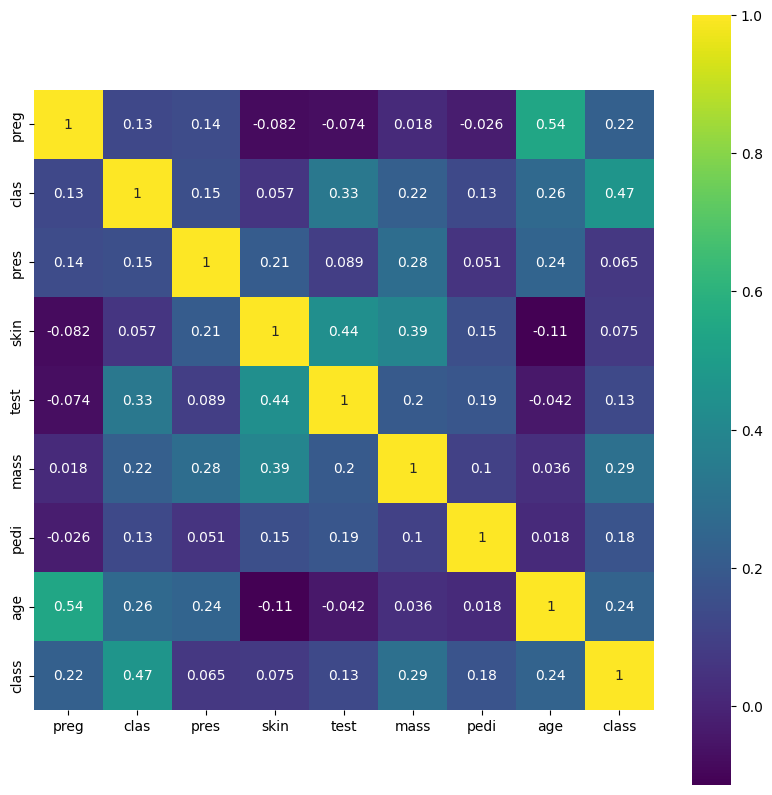

In [24]:
plt.figure(figsize=(10,10)) #se ajustará el tamaño de la figura
ax=sns.heatmap(data.corr(), vmax=1, square=True, annot=True, cmap="viridis") #se creará un mapa de calor de la correlación de los datos

se oberva que la correlacion entre caracteristicas no es alta o mayor al 75% lo cual indica que no tendremos problema. sin embargo la correalcion entre clase es baja.

 la función data.skew() de Pandas calcula la asimetría de cada columna en un DataFrame, proporcionando una medida de la simetría de la distribución de los datos. Una asimetría cercana a cero indica una distribución simétrica, mientras que valores positivos o negativos sugieren sesgo hacia la derecha o izquierda, respectivamente. Comprender la asimetría es esencial, ya que distribuciones sesgadas pueden afectar la precisión de los modelos de machine learning y la validez de las inferencias estadísticas.

In [11]:
data.skew() #se analizará la asimetría de los datos

preg     0.902
clas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.562
age      1.130
class    0.635
dtype: float64

Variables con asimetría positiva (sesgo a la derecha):
preg (0.902): Indica que la distribución tiene una cola más larga hacia la derecha, con valores más altos que la media.
pedi (1.562): Similarmente, muestra una distribución sesgada a la derecha, con una mayor concentración de valores bajos y una cola extendida hacia valores más altos.
age (1.130): También presenta un sesgo positivo, sugiriendo que la mayoría de los datos se agrupan por debajo de la media, con algunos valores más altos.

Variables con asimetría negativa (sesgo a la izquierda):
pres (-1.844): Muestra una distribución sesgada a la izquierda, con una cola más larga hacia valores más bajos que la media.
mass (-0.429): Indica una ligera asimetría negativa, con una mayor concentración de valores por encima de la media y una cola hacia valores más bajos.

Variables con asimetría cercana a cero (distribución aproximadamente simétrica):
clas (0.174): Presenta una distribución casi simétrica, con una ligera inclinación hacia la derecha.
skin (0.109): Similarmente, muestra una distribución casi simétrica, con una ligera inclinación hacia la derecha.

Para corroborar los hallazgos obtenidos mediante la estadística descriptiva, es útil generar gráficos que visualicen la distribución de los datos y confirmen las observaciones previas.

se iniciará con el histograma.

C:\Users\ardil\AppData\Local\Temp\ipykernel_20200\2335559848.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['preg'], ax=axes[0, 0])
C:\Users\ardil\AppData\Local\Temp\ipykernel_20200\2335559848.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['clas'], ax=axes[0, 1])
C:\Users\ard

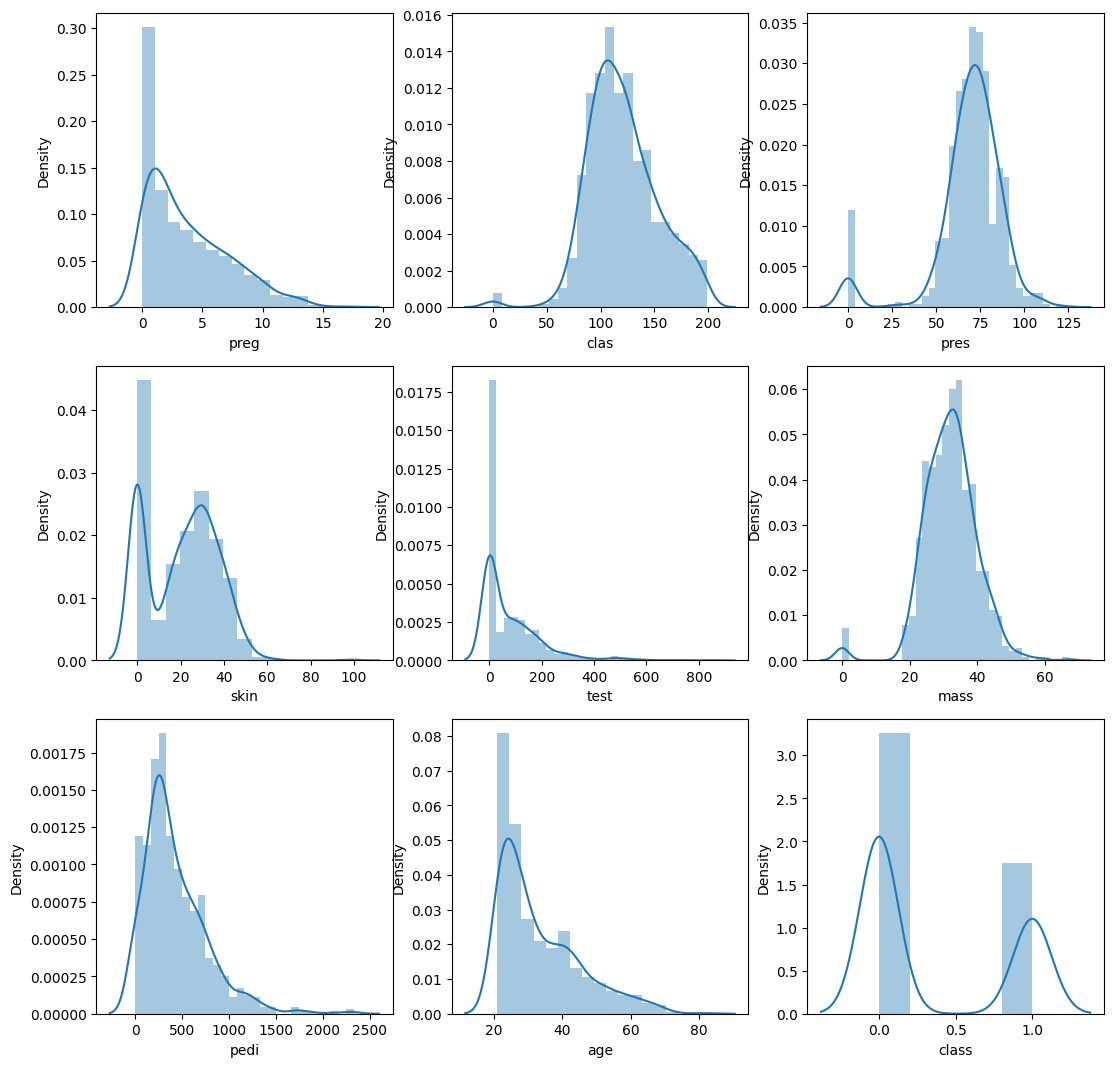

In [22]:
f, axes = plt.subplots(3, 3, figsize=(13, 13) , sharex=False, sharey=False) #se creará un gráfico de 3x3
sns.distplot(data['preg'], ax=axes[0, 0])
sns.distplot(data['clas'], ax=axes[0, 1])
sns.distplot(data['pres'], ax=axes[0, 2])
sns.distplot(data['skin'], ax=axes[1, 0])
sns.distplot(data['test'], ax=axes[1, 1])
sns.distplot(data['mass'], ax=axes[1, 2])
sns.distplot(data['pedi'], ax=axes[2, 0])
sns.distplot(data['age'], ax=axes[2, 1])
sns.distplot(data['class'], ax=axes[2, 2])

plt.show()

Como se mencionó previamente, se identificaron datos atípicos en las variables mass y press, ya que presentan valores de 0. Además, preg muestra un crecimiento exponencial. Es fundamental tener en cuenta que, para ajustar los datos a una distribución normal, será necesario realizar modificaciones en estos valores más adelante.



El diagrama de caja, o box plot, es una herramienta visual fundamental en ciencia de datos que resume la distribución de un conjunto de datos mediante sus cuartiles. Este gráfico permite identificar de manera efectiva valores atípicos, observar la dispersión y la asimetría de los datos, y comparar distribuciones entre diferentes grupos. Al representar la mediana, los cuartiles y los valores extremos, el box plot facilita una comprensión rápida y clara de las características clave de los datos.

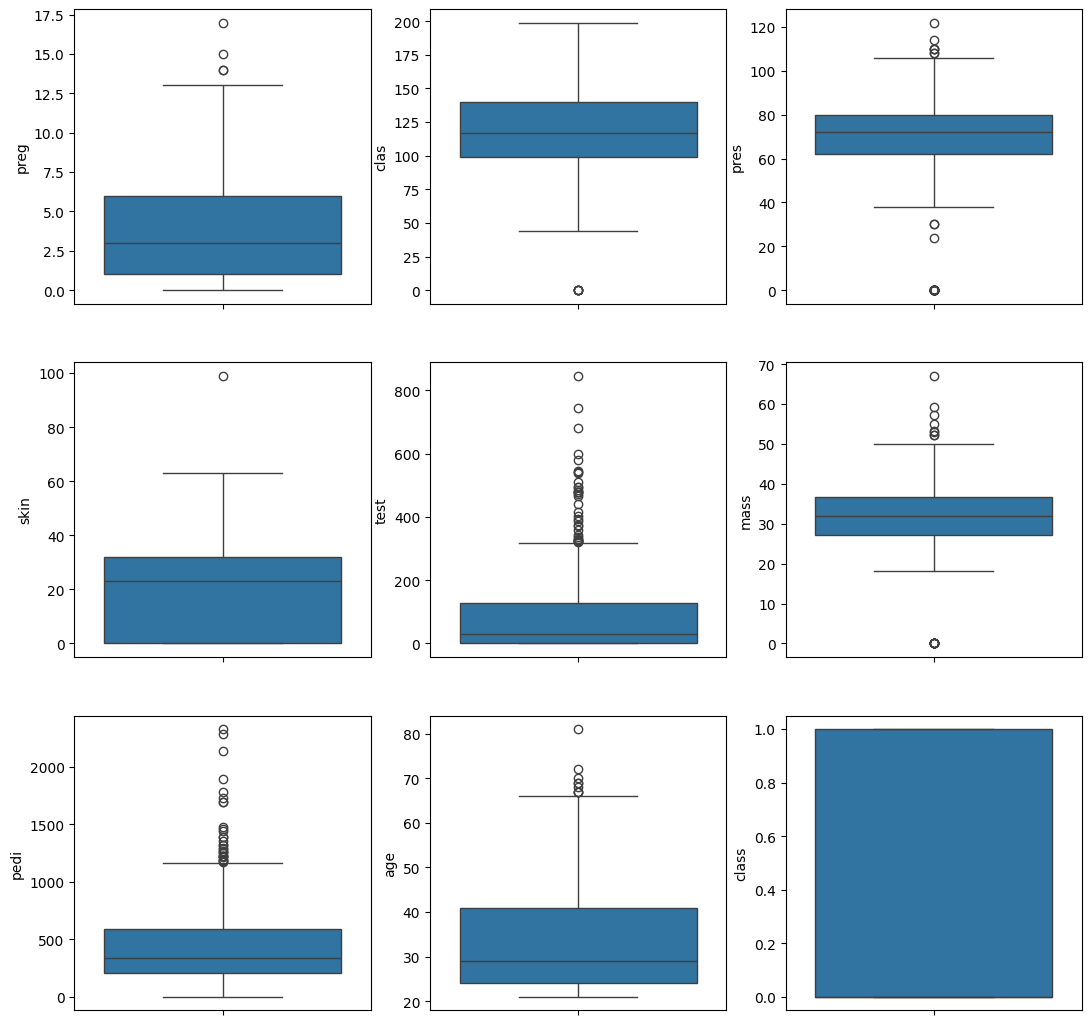

In [23]:
f, axes = plt.subplots(3, 3, figsize=(13, 13) , sharex=False, sharey=False) #se creará un gráfico de 3x3
sns.boxplot(data['preg'], ax=axes[0, 0])
sns.boxplot(data['clas'], ax=axes[0, 1])
sns.boxplot(data['pres'], ax=axes[0, 2])
sns.boxplot(data['skin'], ax=axes[1, 0])
sns.boxplot(data['test'], ax=axes[1, 1])
sns.boxplot(data['mass'], ax=axes[1, 2])
sns.boxplot(data['pedi'], ax=axes[2, 0])
sns.boxplot(data['age'], ax=axes[2, 1])
sns.boxplot(data['class'], ax=axes[2, 2])

plt.show()

El diagrama de caja y bigotes es una herramienta gráfica esencial en el análisis de datos que permite visualizar la distribución de un conjunto de datos. Este gráfico muestra la mediana, los cuartiles y los valores atípicos, facilitando la identificación de la simetría o asimetría de la distribución. Si la mediana se encuentra centrada dentro de la caja, la distribución es aproximadamente simétrica; si está desplazada hacia un lado, indica asimetría. Los puntos que se sitúan por encima o por debajo de los extremos de los bigotes representan valores atípicos, es decir, observaciones que se desvían significativamente del resto de los datos. Por ejemplo, en las columnas 'pedi' y 'test', se observan valores atípicos que deberán ser analizados y, si es necesario, ajustados para asegurar una distribución más cercana a la normalidad.

La matriz de dispersión es una herramienta visual esencial en ciencia de datos que permite analizar simultáneamente las relaciones entre múltiples variables. Al presentar una cuadrícula de diagramas de dispersión, donde cada gráfico muestra la relación entre un par de variables, facilita la identificación de correlaciones, patrones y posibles valores atípicos en el conjunto de datos. Esta visualización es especialmente útil en el análisis exploratorio de datos, ya que ayuda a comprender las interacciones y dependencias entre variables, proporcionando una comprensión más profunda de la estructura subyacente de los datos.

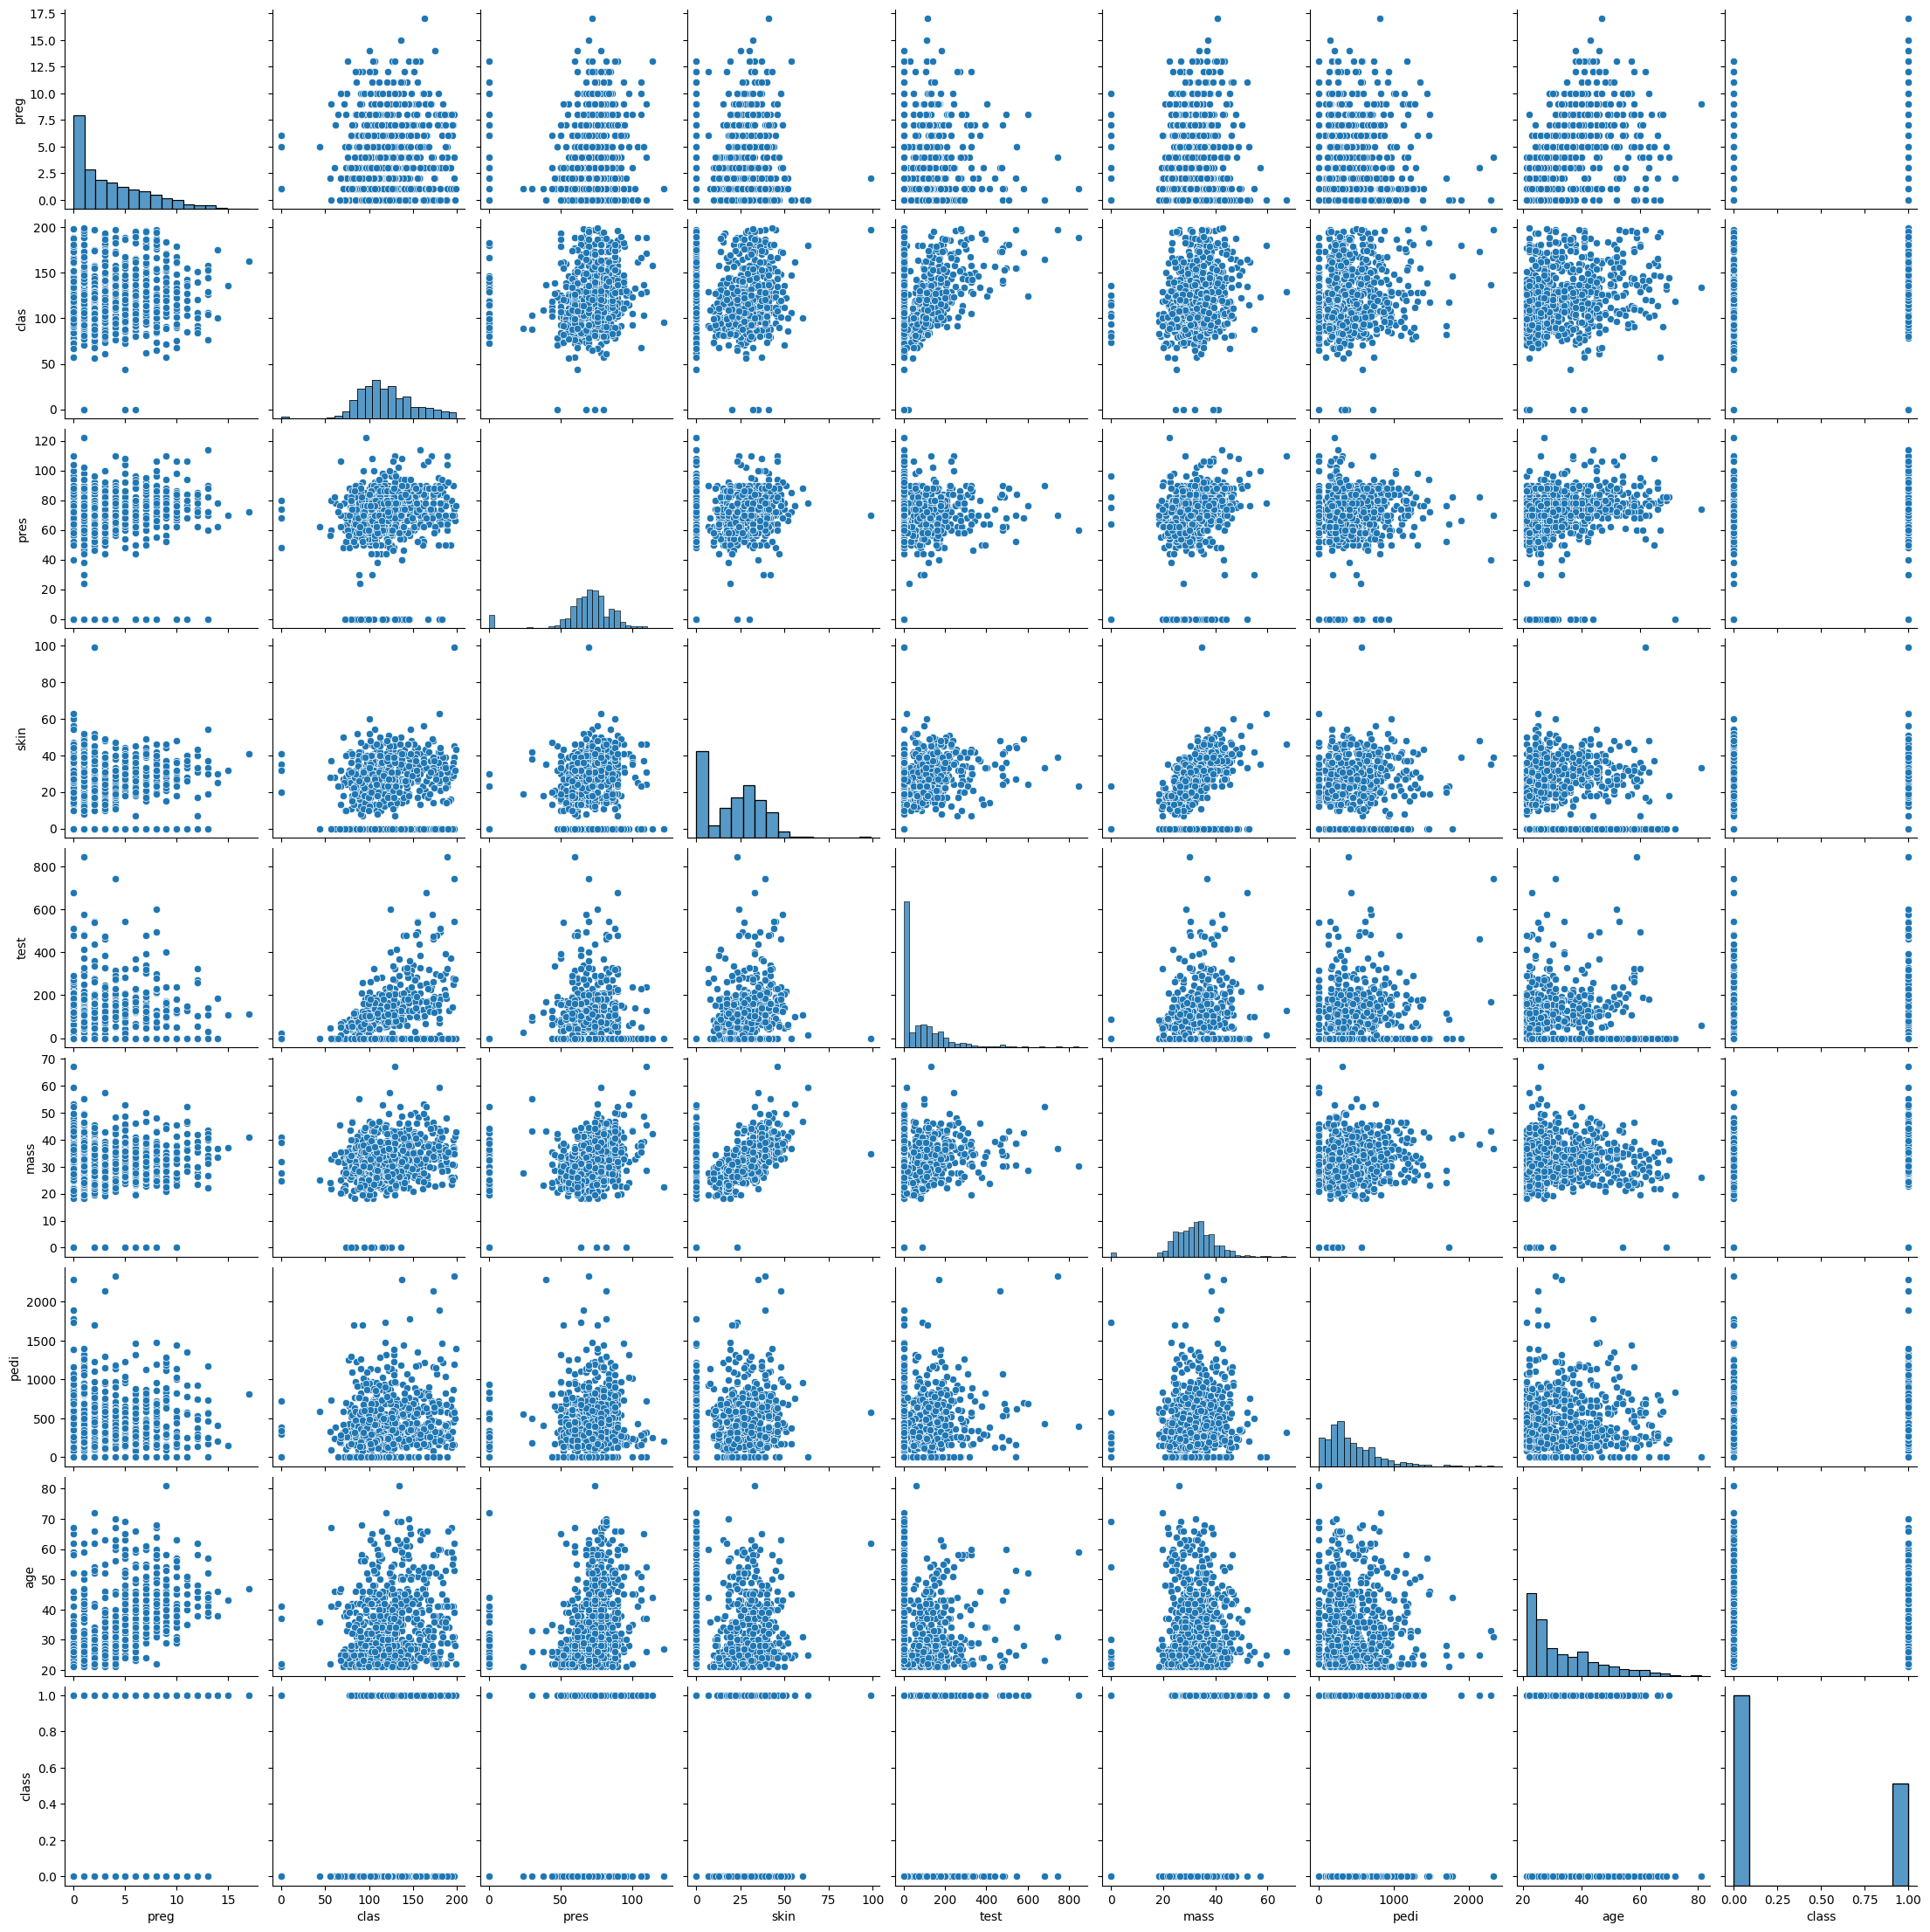

In [25]:
sns.pairplot(data) #se creará un gráfico de pares de los datos

En el contexto del aprendizaje automático, cuando las clases no son claramente distinguibles o se superponen significativamente, los algoritmos de clasificación pueden enfrentar dificultades para aprender patrones que permitan una separación efectiva entre las categorías. Esta superposición puede llevar a una disminución en la precisión del modelo y a una mayor tasa de errores de clasificación.

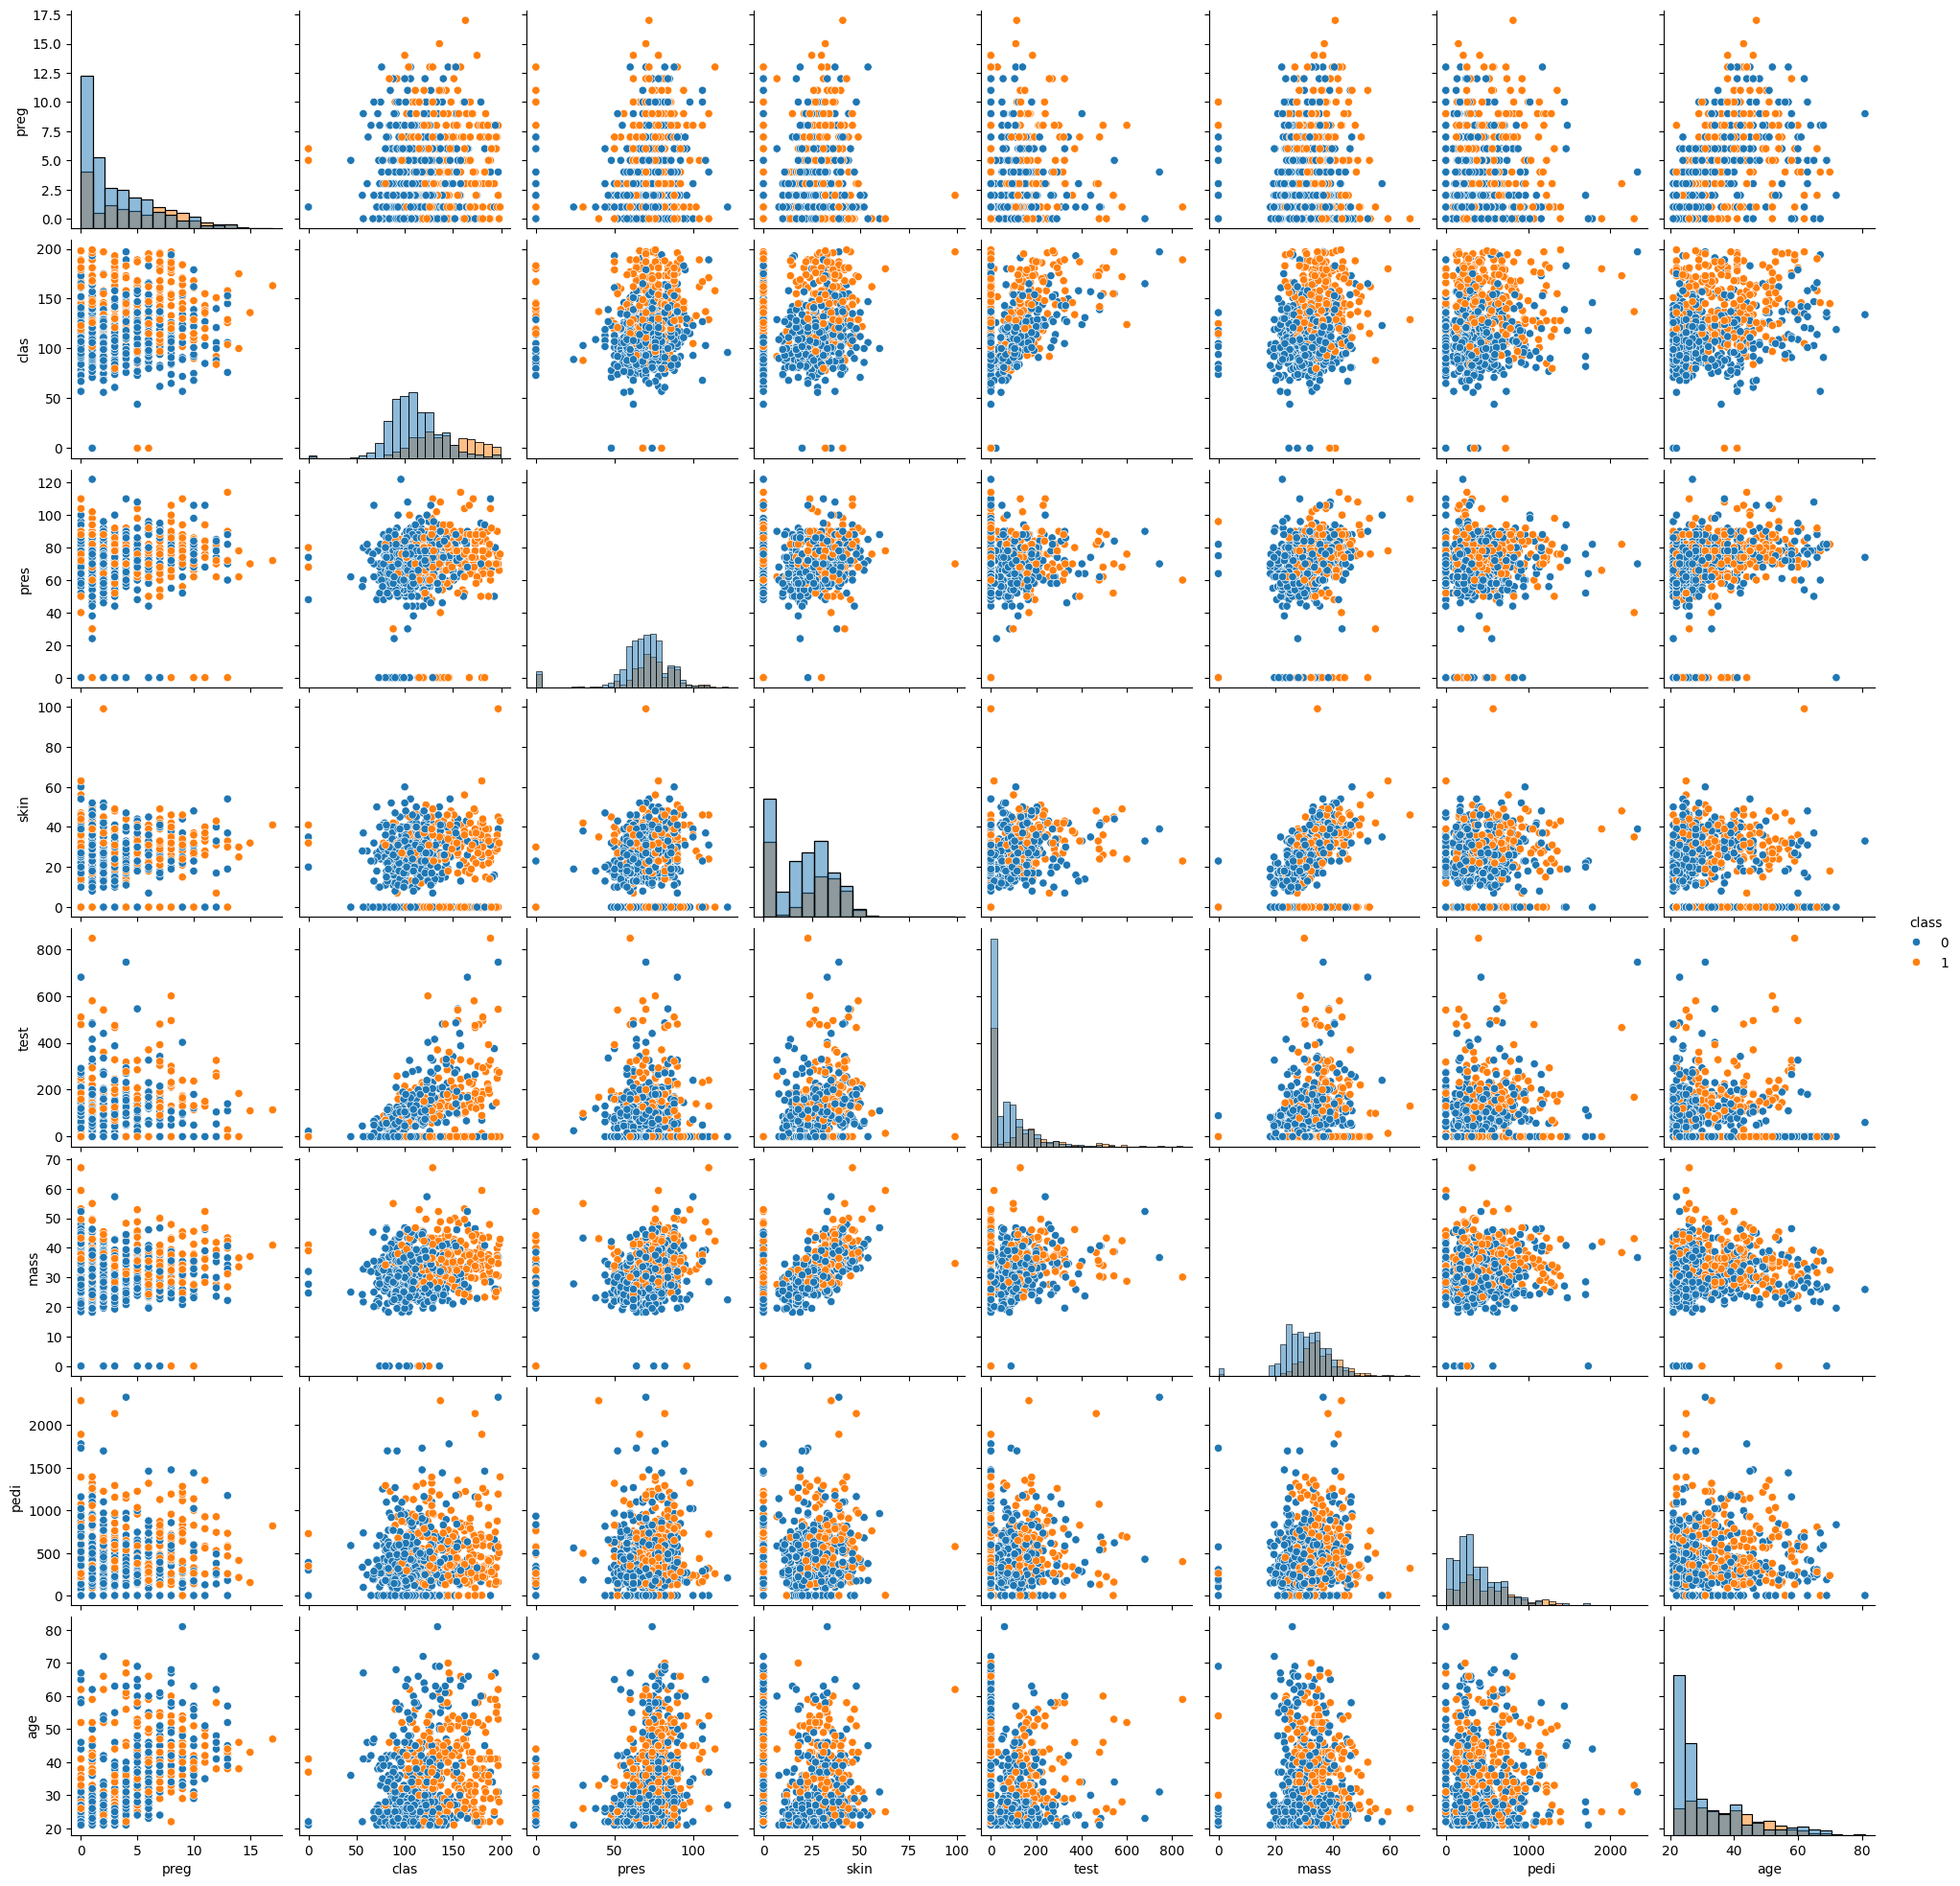

In [27]:
sns.pairplot(data, hue='class', diag_kind="hist") #se creará un gráfico de pares de los datos con la clase como referencia

<Figure size 640x480 with 0 Axes>

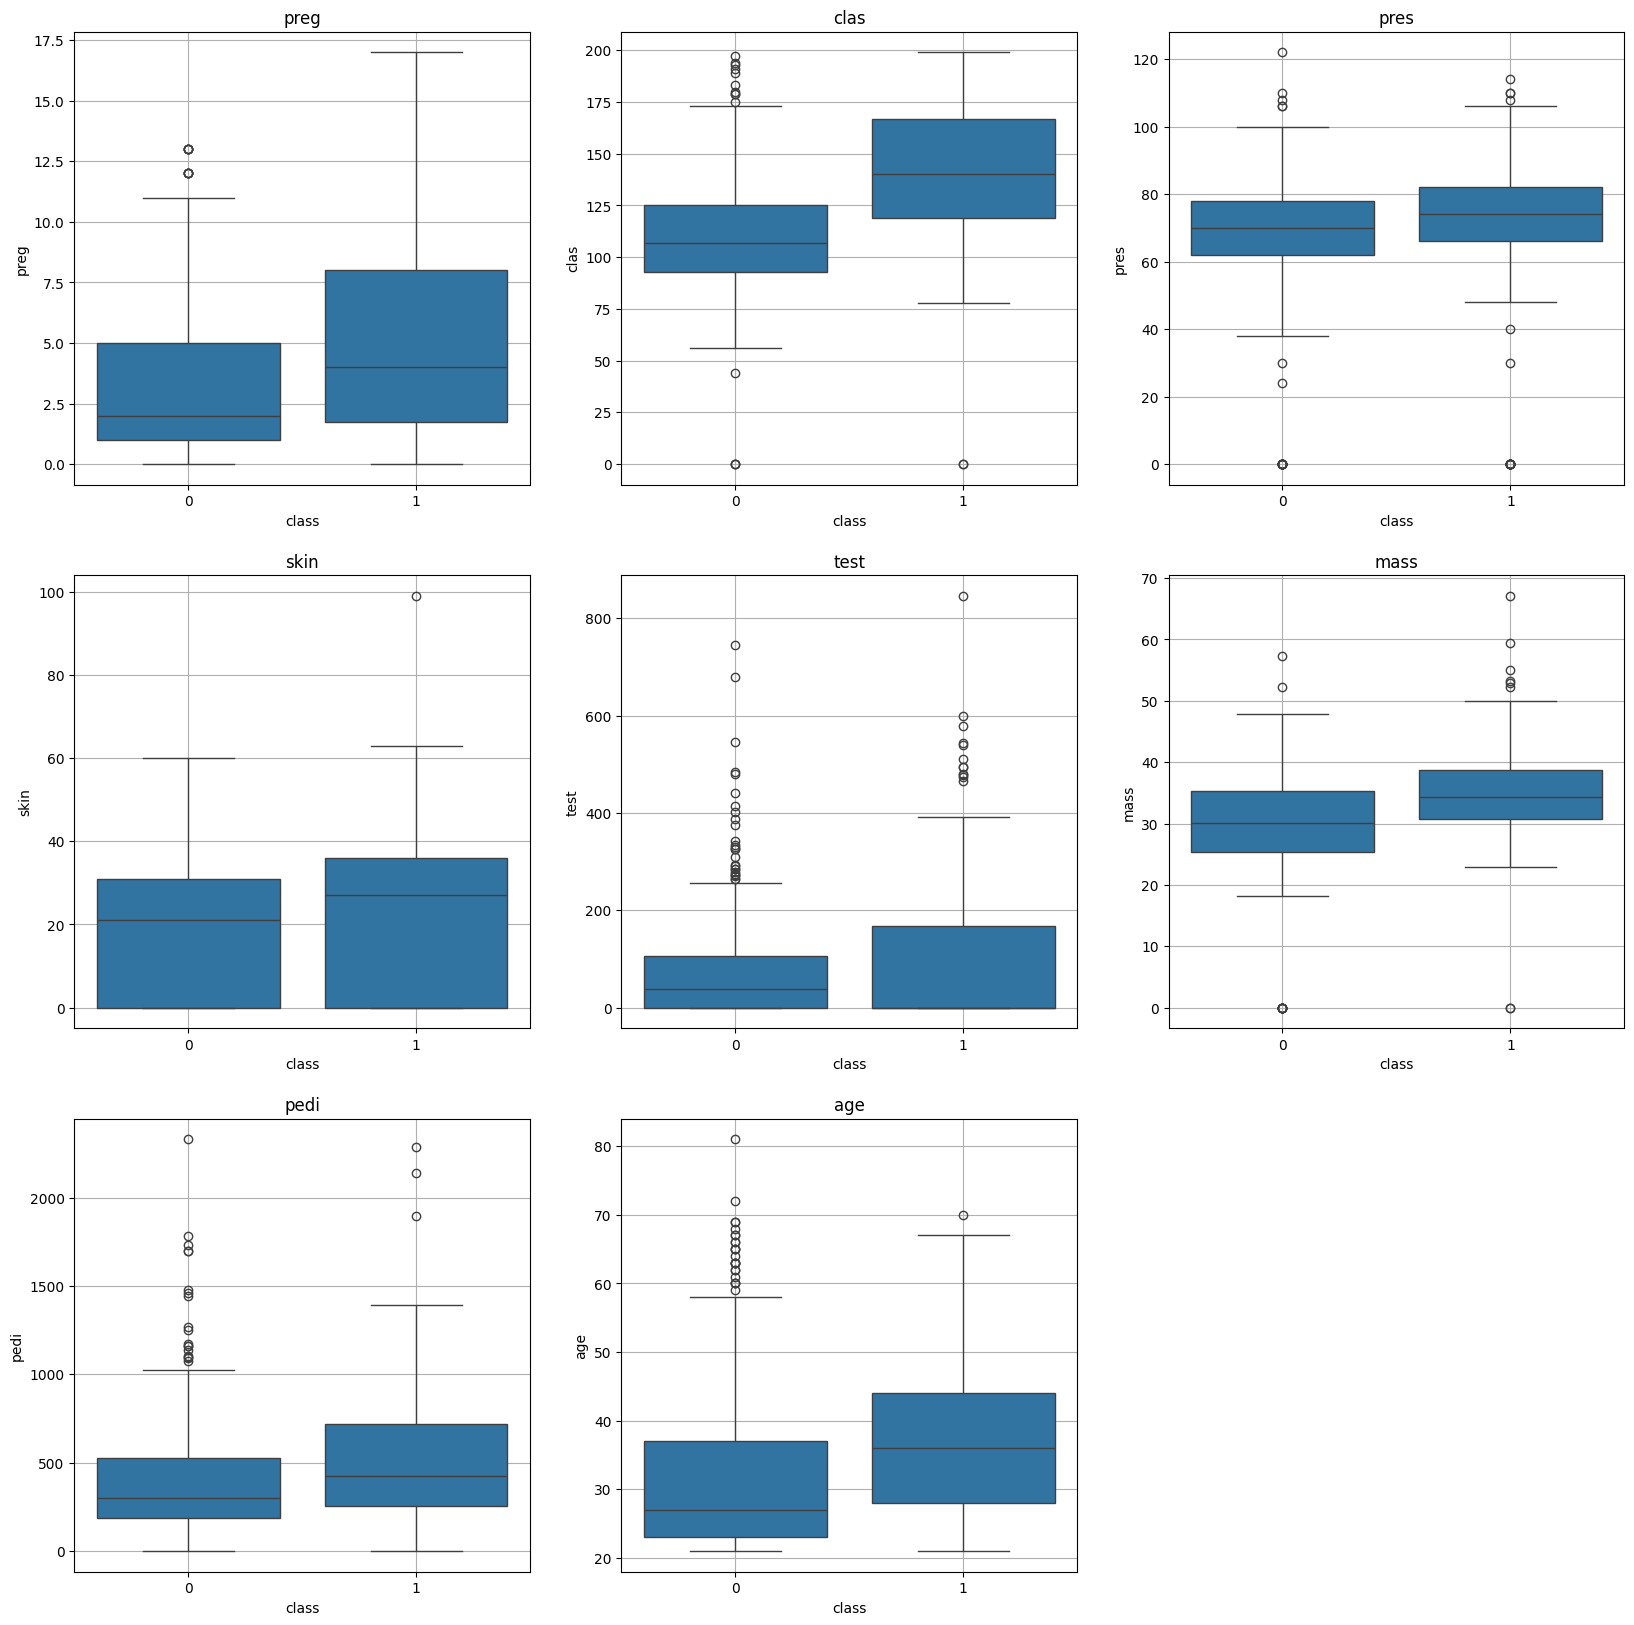

In [42]:
columns=["preg","clas","pres","skin","test","mass","pedi","age","class"]

plt.figure(1)
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1)
sns.boxplot(x='class', y='preg', data=data) #se creará un gráfico de caja de los datos
plt.title('preg')
plt.grid(True)

plt.subplot(3, 3, 2)
sns.boxplot(x='class', y='clas', data=data) #se creará un gráfico de caja de los datos
plt.title('clas')
plt.grid(True)

plt.subplot(3, 3, 3)
sns.boxplot(x='class', y='pres', data=data) #se creará un gráfico de caja de los datos
plt.title('pres')
plt.grid(True)

plt.subplot(3, 3, 4)
sns.boxplot(x='class', y='skin', data=data) #se creará un gráfico de caja de los datos
plt.title('skin')
plt.grid(True)

plt.subplot(3, 3, 5)
sns.boxplot(x='class', y='test', data=data) #se creará un gráfico de caja de los datos
plt.title('test')
plt.grid(True)

plt.subplot(3, 3, 6)
sns.boxplot(x='class', y='mass', data=data) #se creará un gráfico de caja de los datos
plt.title('mass')
plt.grid(True)

plt.subplot(3, 3, 7)
sns.boxplot(x='class', y='pedi', data=data) #se creará un gráfico de caja de los datos
plt.title('pedi')
plt.grid(True)

plt.subplot(3, 3, 8)
sns.boxplot(x='class', y='age', data=data) #se creará un gráfico de caja de los datos
plt.title('age')
plt.grid(True)

plt.show()


Se puede observar que existe superposición en las variables con respecto a la clase, lo que indica que el algoritmo tendrá dificultades para diferenciar correctamente las categorías y realizar predicciones precisas.